<a href="https://colab.research.google.com/github/geeythree/Decision-Tree-Regression-Model/blob/main/decision_tree_regression_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import pandas as pd
import numpy as np

In [20]:
dataset = pd.read_csv('petrol_consumption.csv')

In [21]:
dataset.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [22]:
X = dataset.drop('Petrol_Consumption', axis=1)
y = dataset['Petrol_Consumption']
feature_cols=['Petrol_tax','Average_income','Paved_Highways','Population_Driver_licence(%)']

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [66]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(criterion="mse", max_depth=3)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [67]:
y_pred = regressor.predict(X_test)

In [68]:
df=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df

,Actual,Predicted
29,534,547.800000
4,410,453.555556
26,577,617.312500
30,571,617.312500
32,577,617.312500
37,704,617.312500
34,487,617.312500
40,587,559.500000
7,467,453.555556
10,580,453.555556


In [70]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 56.86819444444444
Mean Squared Error: 4890.384031828704
Root Mean Squared Error: 69.93128078212713


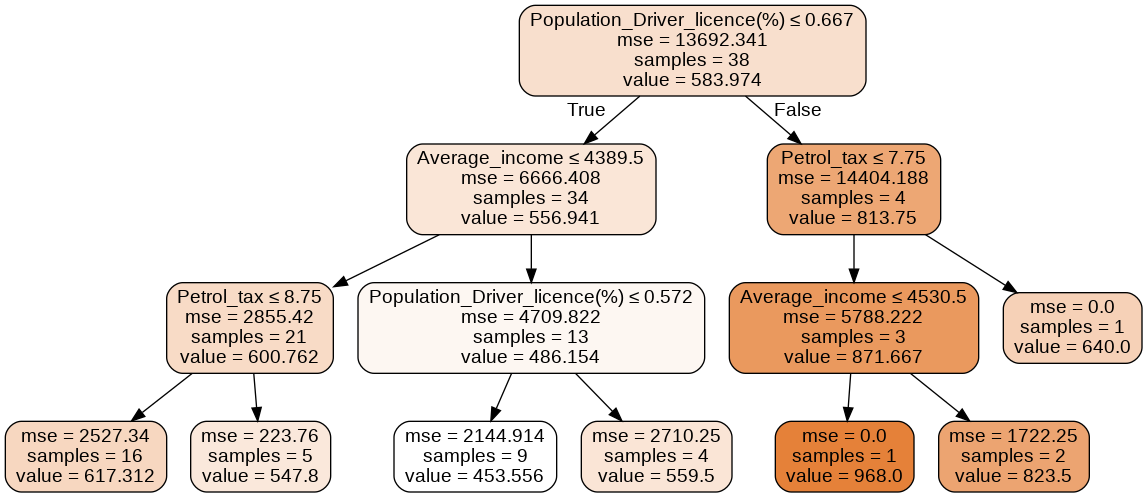

In [71]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()
export_graphviz(regressor, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,
                feature_names=feature_cols,
                class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write('pertol.png')
Image(graph.create_png())